I certify that the code and data in this assignment were generated independently, using only the tools
and resources defined in the course and that I did not receive any external help, coaching or contributions
during the production of this work.

In [ ]:
!pip install gym

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

In [3]:
from google.colab import widgets
import time

In [4]:
#temp - trying different rewards
reward = [0,0.5,1,1.5,0.5,1,1.5,2,1,1.5,2,2.5,1.5,2,2.5,3]
reward = [0,1,2,3,1,2,3,4,2,3,4,5,3,4,5,100]
reward = np.array(reward).reshape(4,4)
np.array([0,1,2,3,1,2,3,4,2,3,4,5,3,4,5,100]).reshape(4,4)
np.append(np.arange(15), 100).reshape(4,4)

In [5]:
reward

array([[  0,   1,   2,   3],
       [  1,   2,   3,   4],
       [  2,   3,   4,   5],
       [  3,   4,   5, 100]])

In [7]:
class GridEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  #mode=0 (deterministic); mode=1 (stochastic)
  def __init__(self, mode=0, rows=4, cols=4):
    self.rows = int(rows);  self.cols = int(cols)
    self.observation_space = spaces.Discrete(self.rows*self.cols)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 4* self.rows* self.cols
    self.qa_table = self.set_q_table()
    self.mode = mode
    # self.qa_table = np.zeros((16,4))

  def set_q_table(self):
    qa_table = {}
    for i in range(self.rows):
      for j in range(self.cols):
        qa_table[(i,j)] = np.zeros(4)
    return qa_table

  def reset(self):
    self.timestep = 0
    self.agent_pos = [0, 0]
    self.goal_pos = [3, 3]
    #rewards update
    self.reward = np.array([0,1,2,3,1,2,3,4,2,3,4,5,3,4,5,150]).reshape(4,4)
    self.state = np.zeros((4, 4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    # self.qa_table = np.zeros((4,4))
    observation = self.state.flatten()
    return observation
  
  def get_action(self, eps):
    num = np.random.random()
    if num > eps:
      #best action
      action = (self.qa_table[tuple(self.agent_pos)]).argmax()
    else:
      #random action
      action = np.random.choice([0,1,2,3])
    return action

  def step(self, action):
    prob = np.random.random()
    # prob = 0.05
    # (self.agent_pos[0] == self.agent_pos[1]) and 
    if self.mode==1 and prob<0.05:
      pass
    else:
      if action == 0:
        self.agent_pos[0] += 1
      if action == 1:
        self.agent_pos[0] -= 1
      if action == 2:
        self.agent_pos[1] += 1
      if action == 3:
        self.agent_pos[1] -= 1        
    
    self.agent_pos = np.clip(self.agent_pos, 0, self.rows-1)
    self.state = np.zeros((self.rows,self.cols))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    # reward = np.random.choice(self.reward)
    reward = self.reward[tuple(self.agent_pos)]
    self.reward[tuple(self.agent_pos)]=0
    # print(reward)

    self.timestep += 1
    done = True if self.timestep >= self.max_timesteps or (self.agent_pos == self.goal_pos).all() else False
    info = {}

    return observation, reward, done, info

  def render(self):
    plt.imshow(self.state)

In [69]:
#defining GridEnvironment
#Q-Learning
#mode=0 means Deterministic; mode=1 means Stochastic
env = GridEnvironment(mode=0, rows=4, cols=4)
output_grid = widgets.Grid(1, 1)

""


In [70]:
obs = env.reset()
episode = 1000
df=(0.01) ** (1/episode)
eps = 1
alpha = 0.1
gama = 0.9
iteration_Q = []
reward_per_episode_Q = []
eps_decay_Q = []

In [ ]:
#the env.render() code was commented, as it was taking too much time in training.
#If needed, please uncomment the render code from below cell.

In [71]:
#main action
#Q-Learning Algorithm
for i in range(episode):
  eps_decay_Q.append(eps)
  count = 0
  obs = env.reset()
  total_reward = 0
  while True:
    count += 1
    agent_old_pos = env.agent_pos.copy()
    # print(env.qa_table)
    # print(env.agent_pos)
    # action = get_action(env, eps)
    action = env.get_action(eps)
    # selected_action.append(action)
    observation, reward, done, _ = env.step(action)
    total_reward += reward
    env.qa_table[tuple(agent_old_pos)][action] = env.qa_table[tuple(agent_old_pos)][action] + alpha*(reward + gama*env.qa_table[tuple(env.agent_pos)].max() - 
                                                                                           env.qa_table[tuple(agent_old_pos)][action])
    # with output_grid.output_to(0,0):
    #   output_grid.clear_cell()
    #   env.render()
    #   print('Q Learning - Non-Deterministic')
    #   print('Reward: ', reward)
    # time.sleep(0.1)
    if done:
      break
  iteration_Q.append(count)
  reward_per_episode_Q.append(total_reward)
  eps *= df
# print(selected_action)

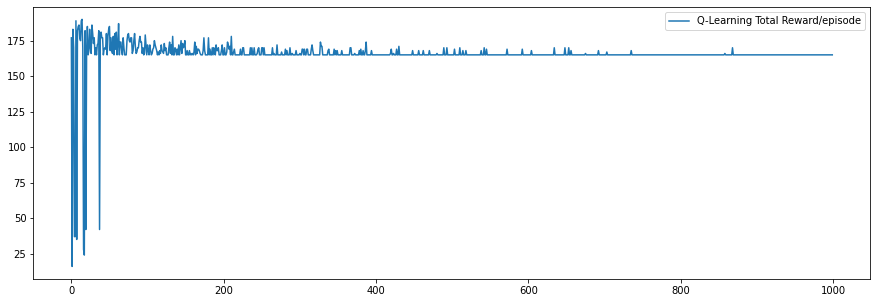

In [26]:
plt.figure(figsize=(15,5))
# plt.plot(iteration_Q[800:], label="Q-Learning Iterations")
# plt.plot(range(episode), eps_decay_Q, label="Epsilon Decay graph")
plt.plot(reward_per_episode_Q, label="Q-Learning Total Reward/episode")
plt.legend()
plt.show()
# plt.ylim(0,20)

In [ ]:
# iterations

In [79]:
env_S = GridEnvironment(mode=0, rows=4, cols=4)
output_grid = widgets.Grid(1, 1)

""


In [80]:
obs1 = env_S.reset()
episode = 1000
df=(0.01) ** (1/episode)
eps = 1
alpha = 0.1
gama = 0.9
iteration_SARSA = []
reward_per_episode_SARSA = []

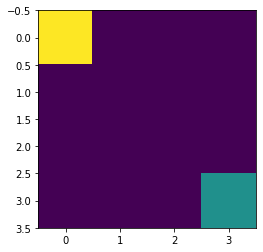

In [ ]:
env.render()

In [ ]:
#the env.render() code was commented, as it was taking too much time in training.
#If needed, please uncomment the render code from below cell.

In [81]:
#SARSA Algorithm
for i in range(episode):
  total_reward = 0
  count = 0
  obs1 = env_S.reset()
  old_action = env_S.get_action(eps)
  while(True):
    count += 1
    agent_old_pos = env_S.agent_pos.copy()
    observation, reward, done, _ = env_S.step(old_action)
    total_reward += reward
    new_action = env_S.get_action(eps)
    env_S.qa_table[tuple(agent_old_pos)][old_action] = env_S.qa_table[tuple(agent_old_pos)][old_action] + alpha*(reward + gama*(env_S.qa_table[tuple(env_S.agent_pos)][new_action]) - env_S.qa_table[tuple(agent_old_pos)][old_action])
    old_action = new_action
    # with output_grid.output_to(0,0):
    #   output_grid.clear_cell()
    #   env.render()
    #   print('SARSA Non-Deterministic')
    #   print('Reward: ', reward)
    # time.sleep(1)
    if done:
      break
  eps *= df
  reward_per_episode_SARSA.append(total_reward)
  iteration_SARSA.append(count)

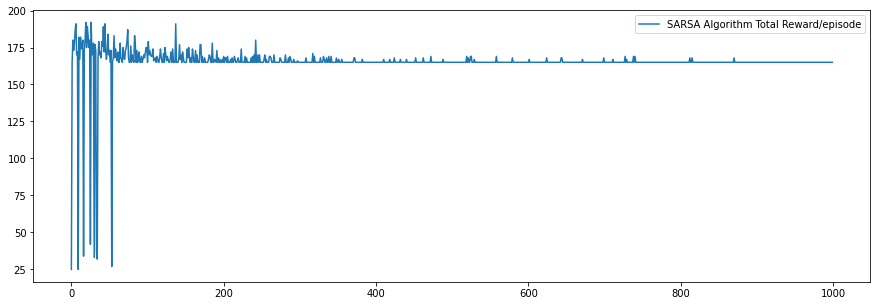

In [42]:
plt.figure(figsize=(15,5))
# plt.plot(iteration_SARSA[800:], label="SARSA Algorithm | No of Steps")
plt.plot(reward_per_episode_SARSA, label="SARSA Algorithm Total Reward/episode")
plt.legend()
plt.show()

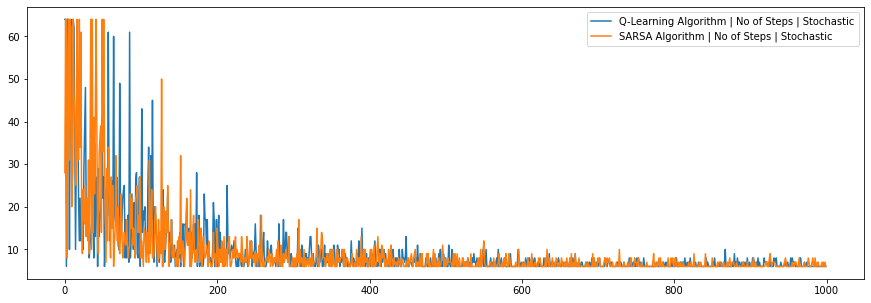

In [57]:
#comparison of both the algorithms
#mode=0 Non-Deterministic environment comparison
plt.figure(figsize=(15,5))
plt.plot(iteration_Q, label="Q-Learning Algorithm | No of Steps | Stochastic")
plt.plot(iteration_SARSA[:], label="SARSA Algorithm | No of Steps | Stochastic")
# plt.plot(reward_per_episode_SARSA, label="SARSA Algorithm Total Reward/episode")
plt.legend()
plt.show()

In [82]:
#Greedy algorithm
# selected_action = []
iteration_Q = []
reward_Q = []
temp_qa_table = env.qa_table.copy()
for i in range(10):
  count = 0
  total_reward = 0
  env.agent_pos = [0,0]
  obs = env.reset()
  output_grid = widgets.Grid(1, 1)
  while True:
    count += 1
    # action = np.random.randint(3)
    action = np.argmax(temp_qa_table[tuple(env.agent_pos)])
    # selected_action.append(action)
    observation, reward, done, _ = env.step(action)
    total_reward += reward
    # with output_grid.output_to(0,0):
    #   output_grid.clear_cell()
    #   env.render()
    #   print('Reward: ', reward)
    # time.sleep(0.01)
    if done:
      break
  iteration_Q.append(count)
  reward_Q.append(total_reward)
  # print(selected_action)

""


""


""


""


""


""


""


""


""


""


In [64]:
#final q table for Q_learning
for i in range(env.rows):
  for j in range(env.cols):
    print(env.qa_table[(i,j)])

[99.98816685 87.87141214 95.596317   88.66634627]
[ 69.31194624  58.59299963 107.37979074  46.12954149]
[118.36073224  52.98250516  56.74911924  47.96801891]
[91.97041976 24.12661997 25.482269   39.21878482]
[109.99577916  86.94929223 103.94329958  97.65374659]
[ 73.1621966   56.75247555 117.99702593  48.32504861]
[128.97015575  83.00163864  87.05854268  60.86628531]
[129.07991519  36.41984985  52.65493731  84.53123512]
[119.99925981  96.12685797 116.66073491 105.54374948]
[118.02934908  81.44887958 128.58847392  70.07358231]
[138.89052174 107.25412597 128.97104184 112.38426319]
[148.82172492  79.43257067  97.43527668  87.28985147]
[115.8925028  106.25158014 129.99999996 116.26631114]
[125.26286692 116.46660937 140.         116.28430711]
[134.78760031 128.09515888 150.         125.72993006]
[0. 0. 0. 0.]


In [68]:
#final q table for SARSA
for i in range(env_S.rows):
  for j in range(env_S.cols):
    print(env_S.qa_table[(i,j)])

[61.4999539  70.9767551  99.35706165 58.72442716]
[109.62675821  75.7932905   80.09698083  57.66205173]
[110.61613935  33.28735225  26.47132857  27.38927534]
[116.61758886  16.39182194  32.09210241  26.46282423]
[ 7.02129067 14.82217807 89.80726221 21.09815476]
[ 97.20871236  69.14465915 119.80984035  66.49119566]
[107.19466671  81.20388355 129.93366237  83.27265229]
[139.98825263  88.1190701  107.70370227  89.80480579]
[15.03284697  2.83145795 13.02228575  2.28670888]
[ 39.09244131  27.81836822 119.78920936   4.73965147]
[100.10557977  50.48727554 137.78559242  54.36685182]
[150.         104.24465306 125.42773003 116.32426552]
[ 5.88384761  1.12784518 35.30017595  0.54761962]
[15.39985507 19.62135811 87.87380211  7.45540237]
[ 47.30866182  52.72404542 149.63024479  24.65333901]
[0. 0. 0. 0.]
